In [1]:
import matplotlib
import numpy as np
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm
import galsim
from copy import deepcopy

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-065 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-067
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


In [2]:
# needs to be odd on a side, e.g., for a 5x5 scene

# Define the range and number of points for each axis
x_min, x_max, x_points = -2.5, 2.5, 5
y_min, y_max, y_points = -2.5, 2.5, 5

# Generate evenly spaced points for each axis
x = np.linspace(x_min, x_max, x_points)
y = np.linspace(y_min, y_max, y_points)

# Create a 2D grid of points
X, Y = np.meshgrid(x, y)

# Stack the coordinates to get a grid of (x, y) pairs
grid_points = np.column_stack([X.ravel(), Y.ravel()])

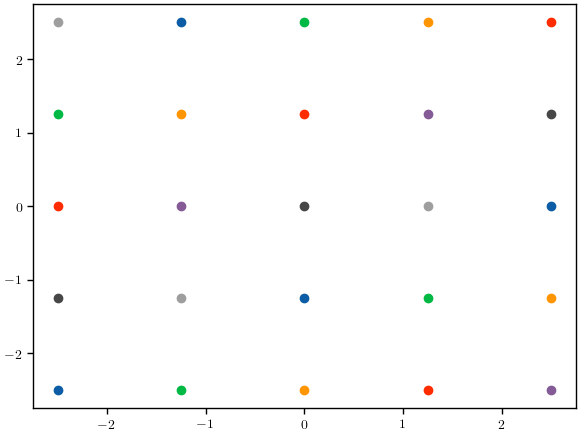

In [3]:
for x, y in grid_points:
    plt.scatter(x, y)

plt.show()

In [4]:
def make_grid(side_length, num_points):
    # Define the range and number of points for each axis
    x_min, x_max, x_points = -side_length / 2, side_length / 2, num_points
    y_min, y_max, y_points = -side_length / 2, side_length / 2, num_points

    # Generate evenly spaced points for each axis
    x = np.linspace(x_min, x_max, x_points)
    y = np.linspace(y_min, y_max, y_points)

    # Create a 2D grid of points
    X, Y = np.meshgrid(x, y)

    # Stack the coordinates to get a grid of (x, y) pairs
    return np.column_stack([X.ravel(), Y.ravel()])

In [7]:
pprint(make_grid(5, 100))

array([[-2.5       , -2.5       ],
       [-2.44949495, -2.5       ],
       [-2.3989899 , -2.5       ],
       ...,
       [ 2.3989899 ,  2.5       ],
       [ 2.44949495,  2.5       ],
       [ 2.5       ,  2.5       ]])


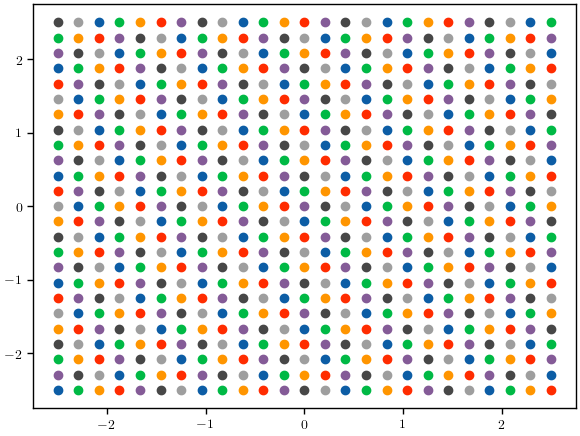

In [8]:
for x, y in make_grid(5, 25):
    plt.plot(x, y, 'o')
plt.show()